In [13]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from pyRF.circuit import Circuit
from pyRF.feedline import TimeDomainSolution
from pyRF.Experimental.examples.feedline_time_domain import Feedline
from pyRF.Experimental.examples.quarter_wave_resonator import QuarterWave
from pyRF.feedline import TimeDomainSolution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
feedline_circuit = Feedline()
feedline_circuit.initialize()
F1 = feedline_circuit.feedline_dict['F1']
E1, E2 = F1.get_eigenfunction(50)

In [34]:
solution = TimeDomainSolution(F1, np.linspace(0e-3,20e-3,50))

In [39]:
phi1 = solution.eigenfunction_database.loc[0]
phi2 = solution.eigenfunction_database.loc[1]


In [71]:
A1right = np.zeros(len(phi1), dtype=np.complex128)
y = np.exp(-((solution.position_values-5e-3)/1e-3)**2)
channel = 0
z_start, z_stop = F1.channel_limits[channel]
inds = np.argwhere(np.logical_and(solution.position_values >= z_start,
                                  solution.position_values <= z_stop)).flatten()
inds


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [72]:
channel_solution = np.zeros(len(solution.position_values))
channel_solution[inds] = y[inds]

In [73]:
solution.eigenfunction_database.values.shape

(2, 50)

In [74]:
# for x in solution.eigenfunction_database.values[1,:]:
#     print(x)

In [75]:
phi_1_right_k = [phi_1_right.coefficients[0] for phi_1_right in solution.eigenfunction_database.values[0,:]]

In [76]:
A1right +=np.fft.fft(channel_solution, norm='ortho')*np.conjugate(phi_1_right_k)

In [86]:
k = np.array(list(solution.eigenfunction_database.keys()))

In [99]:
c = 1e-3
t = 5
A1t = (A1right)*np.exp(-2j*np.pi*c*k*t)


In [100]:
solution_region = np.zeros((len(solution.position_values)), dtype=np.complex128)
solution_region += np.fft.ifft(A1t*phi_1_right_k, norm='ortho')


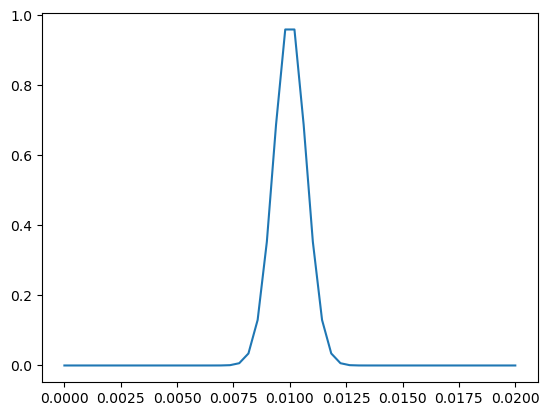

In [101]:
plt.plot(solution.position_values, solution_region)